<a href="https://colab.research.google.com/github/kumarmayank29/ANN_MNIST_IMAGE-CLASSIFICATION-FINAL.ipynb/blob/main/ANN_MNIST_IMAGE_CLASSIFICATION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are using MNIST dataset which is a dataset Consisting of Handwritten Images from 0 to 9.These Numbers are from 0-9 and we need to classify among them so its a multiclass classification problem.There are a total 60000 images consists of digits between 0 to 9.These are all Grayscale Images.Every image in MNIST is 2828 size and total of 784 pixels and all of them are grayscale.(If they would have been colored then dimension would have been 2828*3)

In [31]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [30]:
#Note this data is already in four parts as x_train,x_test,y_train and y_test.MNIST is build in dataset where 
#everything is already splitted up

mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
#        [[0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         ...,
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0]]
#this is one image of size 28*28 784 pixel image 28 rows and 28 colms

x_train[0].shape

(28, 28)

In [33]:
x_train[0][12]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
       253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
x_train.shape
#this means we have 60000 images of size 28*28

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

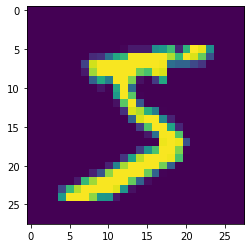

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Heatmap

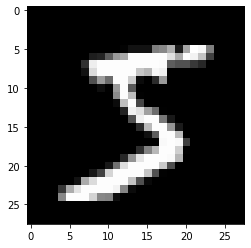

In [11]:
plt.imshow(x_train[0],cmap='gray');

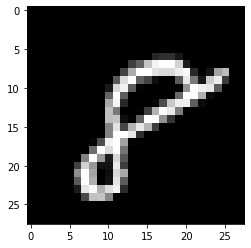

In [12]:
plt.imshow(x_train[59999],cmap='gray');

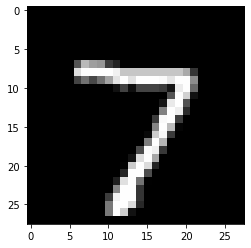

In [13]:
plt.imshow(x_test[0],cmap='gray')

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
# Normalize x_train and x_test..Since total values are 255 so therefore (x/255) will range between 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Image to Feature Vector
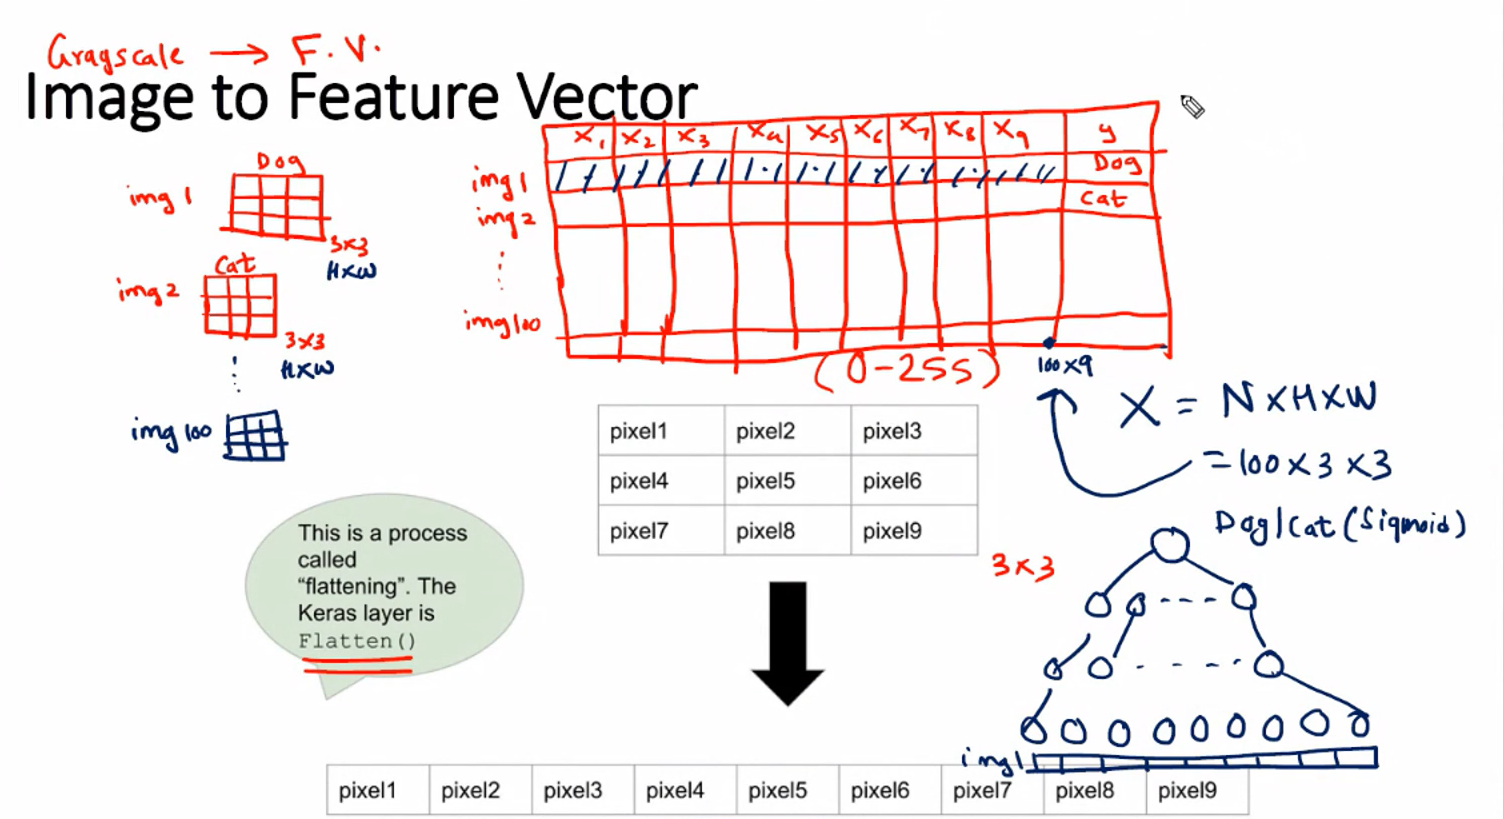



1.   x_train=N2828
2.   y_train=N
3.   x_test=Ntest2828
4.   y_test=Ntest


Flattening Operation
Flattening -Since each image comprised of some pixels in matrix here its 2828 pixel matrix So Image will be Flatten and then after flattening resultant shape will be N28 (Refer to the figure above)

Dense Operation
Here we consider Hidden Layer consists of 128 Neurons with only 1 Hidden Layers and ReLU as the activation function(as we all know Hidden Layers use Relu Activation Function).Why 128->Its just a hyperparameter

Dropout(Regularisation Technique)
It is a regularisation technique.It is going to Randomly dropout the input nodes by setting them to zero so that they do not have any influence on the next layer.And also since its random the nodes that are dropped will be change everytime we look at the data even if we see sample sample twice the nodes that are dropped will be different each time.This is help the neural network to learn more evenly from all of its inputs.

How to set value of Dropout probability? In this case we have set it to 20% .This means every time we go through the network there is 20% chance of dropping that node in the layer or equivalently setting it to zero.Its totally hyperparameter if we think model overfits (performs good only on train data)then use dropout

Dense Layer
Since its a multiclass classification problem so output layer with 10 neurons uses Softmax Function (and not Sigmoid because sigmoid can be used only in Binary Classification)
   



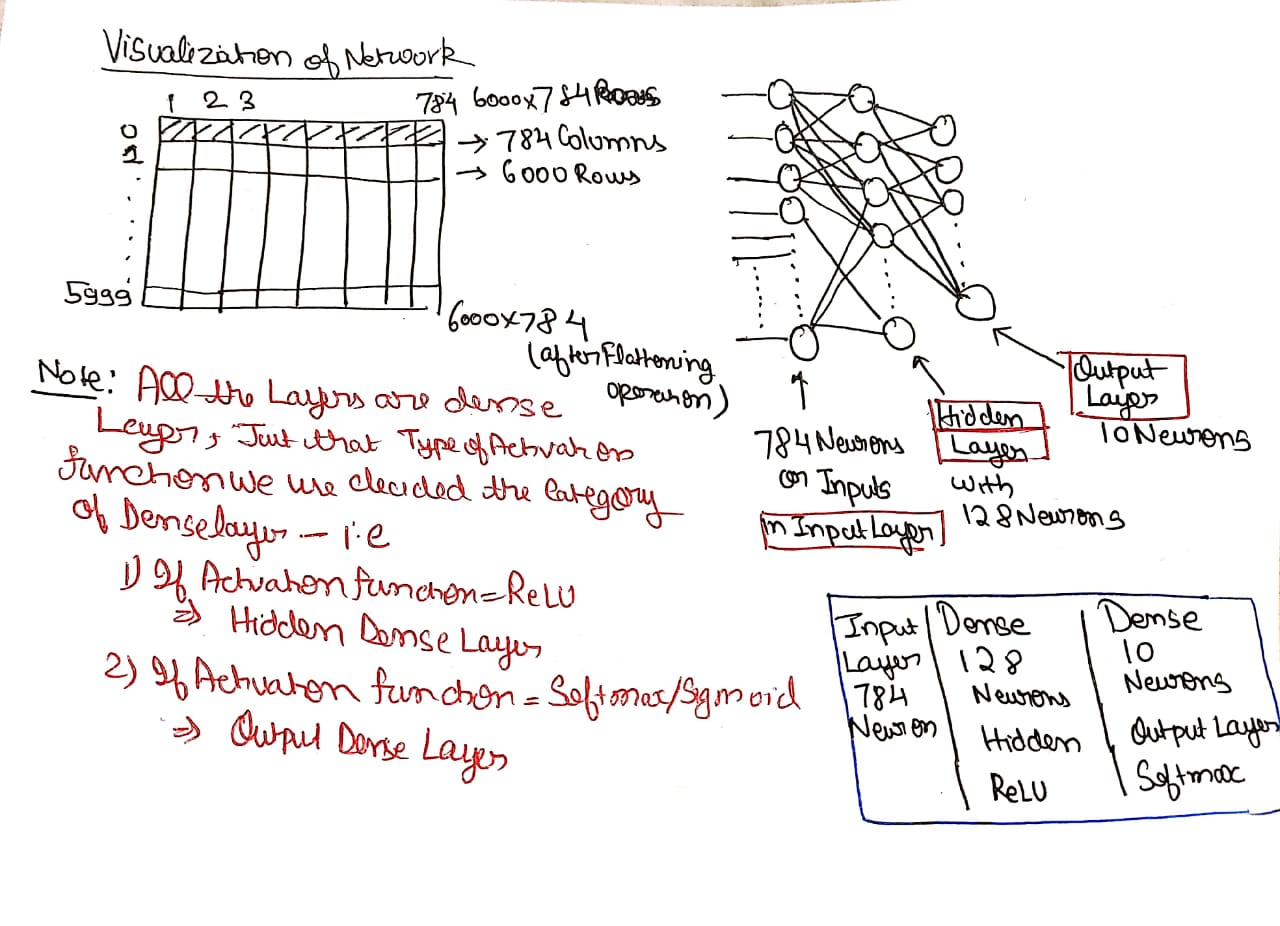

In [34]:
# Build the model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [37]:
# Train the model

r = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.8098 - accuracy: 0.7100 - val_loss: 0.4852 - val_accuracy: 0.8847
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5987 - accuracy: 0.8425 - val_loss: 0.3712 - val_accuracy: 0.9124
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4823 - accuracy: 0.8709 - val_loss: 0.3062 - val_accuracy: 0.9258
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3969 - accuracy: 0.8951 - val_loss: 0.2802 - val_accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8991 - val_loss: 0.3327 - val_accuracy: 0.9135
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.9062 - val_loss: 0.2696 - val_accuracy: 0.9401
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3322 - accuracy: 0.9137 - val_loss: 0.2541 - val_accuracy:

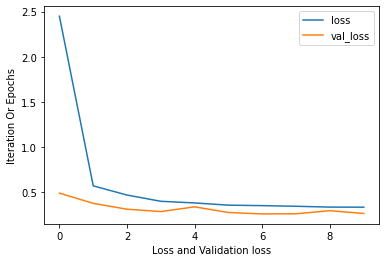

In [40]:
# Plot loss per ietration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel("Loss and Validation loss")
plt.ylabel("Iteration Or Epochs")
plt.legend()

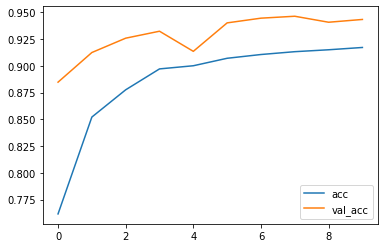

In [41]:
# Plot the accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

**Observation:** The accuracy is almost above 91%.

In [42]:
#Accuracy on the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.9433


[0.2589031755924225, 0.9433000087738037]

Confusion matrix, without normalization
[[ 949    0    0    1    1    0    7    1   21    0]
 [   0 1105    4    2    0    2    1    0   20    1]
 [   1    3  945    7    3    1    3   14   51    4]
 [   0    0    1  929    0   11    0    9   19   41]
 [   1    0    2    0  905    1   16    1    9   47]
 [   2    0    1   12    1  825    6    2   21   22]
 [   2    2    3    0    7   20  912    0   12    0]
 [   2    4    6    8    3    0    0  982   13   10]
 [   3    0    0    3   11   13    4    3  935    2]
 [   1    3    1    2   18   12    1    4   21  946]]


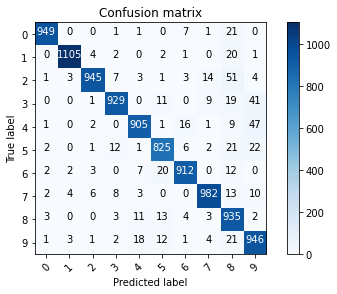

In [44]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
#Our model is predicting on x_test and storing answer of prediction in p_test
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4 ==>18 number of times and indeed they look similar as its handwritten as well as image is
#to small 28*28
# 9 <--> 7---->4 times, 2 <--> 7---->14 times, etc. 

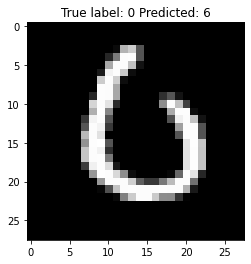

In [46]:
# Lets see some of the misclassified samples

misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

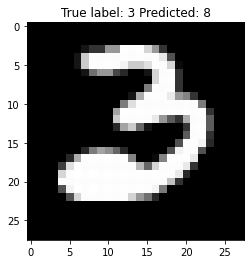

In [47]:
# Lets see some of the misclassified samples

misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

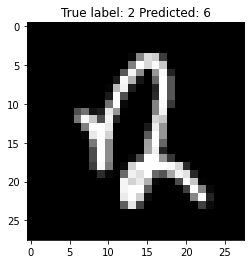

In [48]:
# Lets see some of the misclassified samples

misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

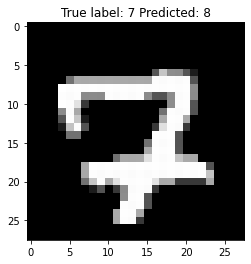

In [49]:
# Lets see some of the misclassified samples

misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

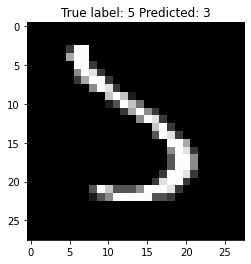

In [50]:
# Lets see some of the misclassified samples

misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));